In [1]:
## Dev for lecture 15

# Import packages
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns


In [143]:
## Generate some fake data for the itch/scratch experiment.
# Use parameters from https://europepmc.org/article/PMC/3335970

n_individuals = 10



itch_intensity_control = np.random.normal(5.8, 2.4, n_individuals)
itch_intensity_scratch = np.random.normal(2.7, 1.95, n_individuals)


d = {'itch_intensity_control': itch_intensity_control, 'itch_intensity_scratch': itch_intensity_scratch}
itch_df = pd.DataFrame(data=d)
itch_df.head()

,itch_intensity_control,itch_intensity_scratch
0,6.677441,3.201350
1,8.842575,3.841460
2,5.402229,2.177407
3,6.736217,5.545400
4,4.799482,1.684480


In [144]:
itch_df["itch_intensity_control"].mean()

5.223054723632574

In [145]:
itch_df["itch_intensity_scratch"].mean()

3.447309666255189

In [146]:
itch_df["itch_difference"] = itch_df["itch_intensity_control"] - itch_df["itch_intensity_scratch"]

In [147]:
itch_df

,itch_intensity_control,itch_intensity_scratch,itch_difference
0,6.677441,3.201350,3.476091
1,8.842575,3.841460,5.001114
2,5.402229,2.177407,3.224822
3,6.736217,5.545400,1.190816
4,4.799482,1.684480,3.115003
5,5.265854,0.930153,4.335701
6,9.078082,2.545638,6.532444
7,1.954453,5.815950,-3.861497
8,2.472192,2.336456,0.135737
9,1.002023,6.394803,-5.392780


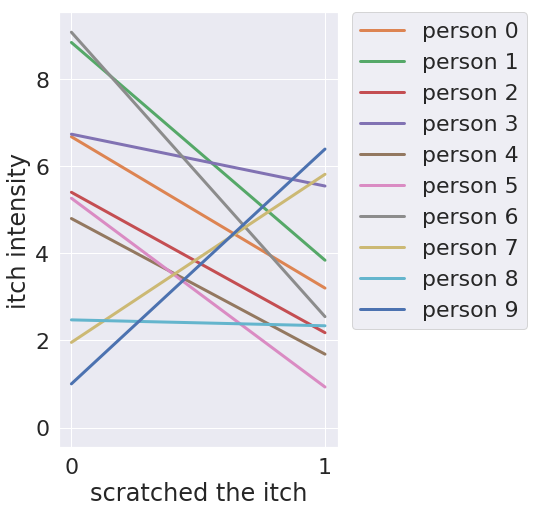

In [148]:
sns.set(font_scale = 2)
plt.figure(figsize=(5,8))
fig_0 = sns.lineplot([0,0 ], [0,0])
for individual in range(n_individuals):
    sns.lineplot([0, 1],
                 [itch_df["itch_intensity_control"][individual], itch_df["itch_intensity_scratch"][individual]],
                 markers = True, lw = 3, label = f"person {individual}")
    

fig_0.set(xlabel="scratched the itch", ylabel = "itch intensity", xticks = [0, 1])
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)
plt.savefig("lecture_15_pairedplot.pdf")

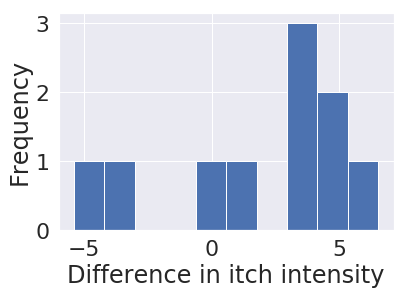

In [149]:
itch_df["itch_difference"].hist()
plt.xlabel("Difference in itch intensity")
plt.ylabel("Frequency")
plt.savefig("Lecture_15_itch_difference_dists.pdf")

In [150]:
itch_df["itch_difference"].mean()

1.7757450573773852

In [151]:
stats.sem(itch_df["itch_difference"])

1.2136500855338959

In [152]:
3.14/0.79


3.9746835443037973

In [153]:
itch_df

,itch_intensity_control,itch_intensity_scratch,itch_difference
0,6.677441,3.201350,3.476091
1,8.842575,3.841460,5.001114
2,5.402229,2.177407,3.224822
3,6.736217,5.545400,1.190816
4,4.799482,1.684480,3.115003
5,5.265854,0.930153,4.335701
6,9.078082,2.545638,6.532444
7,1.954453,5.815950,-3.861497
8,2.472192,2.336456,0.135737
9,1.002023,6.394803,-5.392780


In [154]:
## Import crispr data.
# Two-sample t test to see if brachyury is more important in cancer a than cancer b.


depmap_info = pd.read_csv("data/sample_info.csv")
depmap_crispr_raw = pd.read_csv("data/Achilles_gene_effect.csv")



In [155]:
depmap_info.head()


,DepMap_ID,stripped_cell_line_name,CCLE_Name,alias,COSMIC_ID,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype,sex,...,culture_medium,cas9_activity,RRID,sample_collection_site,primary_or_metastasis,disease,disease_subtype,age,Sanger_model_ID,additional_info
0,ACH-000001,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,ovary,ovary_adenocarcinoma,high_grade_serous,NaN,Female,...,NaN,NaN,CVCL_0465,ascites,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN
1,ACH-000002,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,blood,AML,M3,NaN,Female,...,NaN,NaN,CVCL_0002,haematopoietic_and_lymphoid_tissue,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN
2,ACH-000003,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN,Male,...,NaN,NaN,CVCL_0025,Colon,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN
3,ACH-000004,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,blood,AML,M6,NaN,Male,...,RPMI-1640: 10%FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN
4,ACH-000005,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,blood,AML,M6,NaN,Male,...,RPMI; 10% FBS,13.4,CVCL_2481,bone_marrow,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN


In [156]:
depmap_ids = depmap_crispr_raw["Unnamed: 0"]
#df1 = depmap_crispr_raw.pop('DepMap_ID') # remove column b and store it in df1
#depmap_crispr_raw['DepMap_ID'] = df1 # add b series as a 'new' column.
depmap_crispr_raw['DepMap_ID'] = depmap_ids
depmap_crispr_raw.pop('Unnamed: 0')
depmap_crispr_raw.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),DepMap_ID
0,0.179613,0.088523,-0.199290,-0.015389,0.040801,-0.182563,0.352557,-0.442928,0.303456,0.160660,...,-0.466001,NaN,NaN,0.263742,0.238643,-0.408205,0.296621,0.231980,-0.131181,ACH-000004
1,-0.085168,0.232043,0.180624,0.167672,-0.199979,-0.337434,0.250694,-0.582284,-0.074865,0.020759,...,-0.408006,-0.171205,-0.089135,0.201417,-0.085159,-0.095831,0.051616,0.020377,-0.244495,ACH-000005
2,0.069931,0.080592,-0.060810,0.156743,0.094830,0.149518,0.062414,-0.471719,-0.011677,0.285239,...,-0.280676,-0.046352,0.122235,0.219699,-0.008596,-0.348261,0.085900,-0.393571,-0.436720,ACH-000007
3,0.068167,-0.011359,-0.058659,0.065177,0.036134,0.036811,0.016090,-0.625157,0.167240,0.036333,...,-0.288527,-0.032463,0.107155,0.113906,0.038103,-0.582319,0.231976,-0.120745,-0.556340,ACH-000009
4,0.283630,0.080509,0.009008,0.434810,-0.039682,-0.254499,0.104328,-0.419771,0.135572,0.112920,...,-0.512564,-0.133351,-0.126081,0.270437,0.152349,-0.236307,0.117448,-0.257111,-0.387670,ACH-000011


In [157]:
depmap_crispr = pd.merge(depmap_crispr_raw,depmap_info,on = "DepMap_ID", how= "left")

In [158]:
depmap_crispr.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,culture_medium,cas9_activity,RRID,sample_collection_site,primary_or_metastasis,disease,disease_subtype,age,Sanger_model_ID,additional_info
0,0.179613,0.088523,-0.199290,-0.015389,0.040801,-0.182563,0.352557,-0.442928,0.303456,0.160660,...,RPMI-1640: 10%FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN
1,-0.085168,0.232043,0.180624,0.167672,-0.199979,-0.337434,0.250694,-0.582284,-0.074865,0.020759,...,RPMI; 10% FBS,13.4,CVCL_2481,bone_marrow,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN
2,0.069931,0.080592,-0.060810,0.156743,0.094830,0.149518,0.062414,-0.471719,-0.011677,0.285239,...,RPMI 1640 + 10% FBS,52.3,CVCL_1386,large_intestine,Primary,Colon/Colorectal Cancer,Adenocarcinoma,63.0,SIDM00677,NaN
3,0.068167,-0.011359,-0.058659,0.065177,0.036134,0.036811,0.016090,-0.625157,0.167240,0.036333,...,D10+ITS+Glu,5.8,CVCL_1096,Colon,Primary,Colon/Colorectal Cancer,Adenocarcinoma,72.0,SIDM01233,NaN
4,0.283630,0.080509,0.009008,0.434810,-0.039682,-0.254499,0.104328,-0.419771,0.135572,0.112920,...,DMEM: 90.0%,11,CVCL_7935,lymph_node,Metastasis,Bladder Cancer,Carcinoma,53.0,NaN,NaN


In [159]:
for col in depmap_crispr.columns:
    print(col)


A1BG (1)
A1CF (29974)
A2M (2)
A2ML1 (144568)
A3GALT2 (127550)
A4GALT (53947)
A4GNT (51146)
AAAS (8086)
AACS (65985)
AADAC (13)
AADACL2 (344752)
AADACL3 (126767)
AADACL4 (343066)
AADAT (51166)
AAED1 (195827)
AAGAB (79719)
AAK1 (22848)
AAMDC (28971)
AAMP (14)
AANAT (15)
AAR2 (25980)
AARD (441376)
AARS (16)
AARS2 (57505)
AARSD1 (80755)
AASDH (132949)
AASDHPPT (60496)
AASS (10157)
AATF (26574)
AATK (9625)
ABAT (18)
ABCA1 (19)
ABCA10 (10349)
ABCA12 (26154)
ABCA13 (154664)
ABCA2 (20)
ABCA3 (21)
ABCA4 (24)
ABCA5 (23461)
ABCA6 (23460)
ABCA7 (10347)
ABCA8 (10351)
ABCA9 (10350)
ABCB1 (5243)
ABCB10 (23456)
ABCB11 (8647)
ABCB4 (5244)
ABCB5 (340273)
ABCB6 (10058)
ABCB7 (22)
ABCB8 (11194)
ABCB9 (23457)
ABCC1 (4363)
ABCC10 (89845)
ABCC11 (85320)
ABCC12 (94160)
ABCC2 (1244)
ABCC3 (8714)
ABCC4 (10257)
ABCC5 (10057)
ABCC6 (368)
ABCC8 (6833)
ABCC9 (10060)
ABCD1 (215)
ABCD2 (225)
ABCD3 (5825)
ABCD4 (5826)
ABCE1 (6059)
ABCF1 (23)
ABCF2 (10061)
ABCF3 (55324)
ABCG1 (9619)
ABCG2 (9429)
ABCG4 (64137)
ABCG5 (64

CACNA2D1 (781)
CACNA2D2 (9254)
CACNA2D3 (55799)
CACNA2D4 (93589)
CACNB1 (782)
CACNB2 (783)
CACNB3 (784)
CACNB4 (785)
CACNG1 (786)
CACNG2 (10369)
CACNG3 (10368)
CACNG4 (27092)
CACNG5 (27091)
CACNG6 (59285)
CACNG7 (59284)
CACNG8 (59283)
CACTIN (58509)
CACUL1 (143384)
CACYBP (27101)
CAD (790)
CADM1 (23705)
CADM2 (253559)
CADM3 (57863)
CADM4 (199731)
CADPS (8618)
CADPS2 (93664)
CAGE1 (285782)
CALB1 (793)
CALB2 (794)
CALCA (796)
CALCB (797)
CALCOCO1 (57658)
CALCOCO2 (10241)
CALCR (799)
CALCRL (10203)
CALD1 (800)
CALHM1 (255022)
CALHM2 (51063)
CALHM3 (119395)
CALHM4 (221301)
CALHM5 (254228)
CALHM6 (441168)
CALM1 (801)
CALM2 (805)
CALM3 (808)
CALML3 (810)
CALML4 (91860)
CALML5 (51806)
CALML6 (163688)
CALN1 (83698)
CALR (811)
CALR3 (125972)
CALU (813)
CALY (50632)
CAMK1 (8536)
CAMK1D (57118)
CAMK1G (57172)
CAMK2A (815)
CAMK2B (816)
CAMK2D (817)
CAMK2G (818)
CAMK2N1 (55450)
CAMK2N2 (94032)
CAMK4 (814)
CAMKK1 (84254)
CAMKK2 (10645)
CAMKMT (79823)
CAMKV (79012)
CAMLG (819)
CAMP (820)
CAMSAP1 (157

DMTN (2039)
DMWD (1762)
DMXL1 (1657)
DMXL2 (23312)
DNAAF1 (123872)
DNAAF2 (55172)
DNAAF3 (352909)
DNAAF4 (161582)
DNAAF5 (54919)
DNAH1 (25981)
DNAH10 (196385)
DNAH11 (8701)
DNAH12 (201625)
DNAH14 (127602)
DNAH2 (146754)
DNAH3 (55567)
DNAH5 (1767)
DNAH6 (1768)
DNAH7 (56171)
DNAH9 (1770)
DNAI1 (27019)
DNAI2 (64446)
DNAJA1 (3301)
DNAJA2 (10294)
DNAJA3 (9093)
DNAJA4 (55466)
DNAJB1 (3337)
DNAJB11 (51726)
DNAJB12 (54788)
DNAJB13 (374407)
DNAJB14 (79982)
DNAJB2 (3300)
DNAJB4 (11080)
DNAJB5 (25822)
DNAJB6 (10049)
DNAJB7 (150353)
DNAJB8 (165721)
DNAJB9 (4189)
DNAJC1 (64215)
DNAJC10 (54431)
DNAJC11 (55735)
DNAJC12 (56521)
DNAJC13 (23317)
DNAJC14 (85406)
DNAJC15 (29103)
DNAJC16 (23341)
DNAJC17 (55192)
DNAJC18 (202052)
DNAJC19 (131118)
DNAJC2 (27000)
DNAJC21 (134218)
DNAJC22 (79962)
DNAJC24 (120526)
DNAJC25 (548645)
DNAJC27 (51277)
DNAJC28 (54943)
DNAJC3 (5611)
DNAJC30 (84277)
DNAJC4 (3338)
DNAJC5 (80331)
DNAJC5B (85479)
DNAJC5G (285126)
DNAJC6 (9829)
DNAJC7 (7266)
DNAJC8 (22826)
DNAJC9 (23234)
DN

GPRC6A (222545)
GPRIN1 (114787)
GPRIN2 (9721)
GPRIN3 (285513)
GPS1 (2873)
GPS2 (2874)
GPSM1 (26086)
GPSM2 (29899)
GPSM3 (63940)
GPT (2875)
GPT2 (84706)
GPX1 (2876)
GPX2 (2877)
GPX3 (2878)
GPX4 (2879)
GPX5 (2880)
GPX6 (257202)
GPX7 (2882)
GPX8 (493869)
GRAMD1A (57655)
GRAMD1B (57476)
GRAMD1C (54762)
GRAMD2A (196996)
GRAMD2B (65983)
GRAMD4 (23151)
GRAP (10750)
GRAP2 (9402)
GRASP (160622)
GRB10 (2887)
GRB14 (2888)
GRB2 (2885)
GRB7 (2886)
GREB1 (9687)
GREB1L (80000)
GREM1 (26585)
GREM2 (64388)
GRHL1 (29841)
GRHL2 (79977)
GRHL3 (57822)
GRHPR (9380)
GRIA1 (2890)
GRIA2 (2891)
GRIA3 (2892)
GRIA4 (2893)
GRID1 (2894)
GRID2 (2895)
GRID2IP (392862)
GRIK1 (2897)
GRIK2 (2898)
GRIK3 (2899)
GRIK4 (2900)
GRIK5 (2901)
GRIN1 (2902)
GRIN2A (2903)
GRIN2B (2904)
GRIN2C (2905)
GRIN2D (2906)
GRIN3A (116443)
GRIN3B (116444)
GRINA (2907)
GRIP1 (23426)
GRIPAP1 (56850)
GRK2 (156)
GRK3 (157)
GRK4 (2868)
GRK5 (2869)
GRK6 (2870)
GRK7 (131890)
GRM1 (2911)
GRM2 (2912)
GRM3 (2913)
GRM4 (2914)
GRM5 (2915)
GRM6 (2916)
GR

LMNB2 (84823)
LMNTD1 (160492)
LMNTD2 (256329)
LMO1 (4004)
LMO2 (4005)
LMO3 (55885)
LMO4 (8543)
LMO7 (4008)
LMOD1 (25802)
LMOD2 (442721)
LMOD3 (56203)
LMTK2 (22853)
LMTK3 (114783)
LMX1A (4009)
LMX1B (4010)
LNP1 (348801)
LNPEP (4012)
LNPK (80856)
LNX1 (84708)
LNX2 (222484)
LOC102723996 (102723996)
LONP1 (9361)
LONP2 (83752)
LONRF1 (91694)
LONRF2 (164832)
LONRF3 (79836)
LOR (4014)
LOX (4015)
LOXHD1 (125336)
LOXL1 (4016)
LOXL2 (4017)
LOXL3 (84695)
LOXL4 (84171)
LPA (4018)
LPAR1 (1902)
LPAR2 (9170)
LPAR3 (23566)
LPAR4 (2846)
LPAR5 (57121)
LPAR6 (10161)
LPCAT1 (79888)
LPCAT2 (54947)
LPCAT3 (10162)
LPCAT4 (254531)
LPGAT1 (9926)
LPIN1 (23175)
LPIN2 (9663)
LPIN3 (64900)
LPL (4023)
LPO (4025)
LPP (4026)
LPXN (9404)
LRAT (9227)
LRBA (987)
LRCH1 (23143)
LRCH2 (57631)
LRCH3 (84859)
LRCH4 (4034)
LRFN1 (57622)
LRFN2 (57497)
LRFN3 (79414)
LRFN4 (78999)
LRFN5 (145581)
LRG1 (116844)
LRGUK (136332)
LRIF1 (55791)
LRIG1 (26018)
LRIG2 (9860)
LRIG3 (121227)
LRIT1 (26103)
LRIT2 (340745)
LRIT3 (345193)
LRMDA (

OR10A4 (283297)
OR10A5 (144124)
OR10A7 (121364)
OR10AD1 (121275)
OR10AG1 (282770)
OR10C1 (442194)
OR10G2 (26534)
OR10G3 (26533)
OR10G4 (390264)
OR10G7 (390265)
OR10G8 (219869)
OR10G9 (219870)
OR10H1 (26539)
OR10H2 (26538)
OR10H3 (26532)
OR10H4 (126541)
OR10H5 (284433)
OR10J1 (26476)
OR10J3 (441911)
OR10J5 (127385)
OR10K1 (391109)
OR10K2 (391107)
OR10P1 (121130)
OR10Q1 (219960)
OR10R2 (343406)
OR10S1 (219873)
OR10T2 (128360)
OR10V1 (390201)
OR10W1 (81341)
OR10Z1 (128368)
OR11A1 (26531)
OR11G2 (390439)
OR11H1 (81061)
OR11H12 (440153)
OR11H2 (79334)
OR11H4 (390442)
OR11H6 (122748)
OR11L1 (391189)
OR12D3 (81797)
OR13A1 (79290)
OR13C2 (392376)
OR13C3 (138803)
OR13C4 (138804)
OR13C5 (138799)
OR13C8 (138802)
OR13C9 (286362)
OR13D1 (286365)
OR13F1 (138805)
OR13G1 (441933)
OR13H1 (347468)
OR13J1 (392309)
OR14A16 (284532)
OR14C36 (127066)
OR14I1 (401994)
OR14J1 (442191)
OR1A1 (8383)
OR1A2 (26189)
OR1C1 (26188)
OR1D2 (4991)
OR1D5 (8386)
OR1E1 (8387)
OR1E2 (8388)
OR1F1 (4992)
OR1G1 (8390)
OR1I1 (1

RASAL1 (8437)
RASAL2 (9462)
RASAL3 (64926)
RASD1 (51655)
RASD2 (23551)
RASEF (158158)
RASGEF1A (221002)
RASGEF1B (153020)
RASGEF1C (255426)
RASGRF1 (5923)
RASGRF2 (5924)
RASGRP1 (10125)
RASGRP2 (10235)
RASGRP3 (25780)
RASGRP4 (115727)
RASIP1 (54922)
RASL10A (10633)
RASL10B (91608)
RASL11A (387496)
RASL11B (65997)
RASL12 (51285)
RASSF1 (11186)
RASSF2 (9770)
RASSF3 (283349)
RASSF4 (83937)
RASSF5 (83593)
RASSF6 (166824)
RASSF7 (8045)
RASSF8 (11228)
RASSF9 (9182)
RAVER1 (125950)
RAVER2 (55225)
RAX (30062)
RAX2 (84839)
RB1 (5925)
RB1CC1 (9821)
RBAK (57786)
RBBP4 (5928)
RBBP5 (5929)
RBBP6 (5930)
RBBP7 (5931)
RBBP8 (5932)
RBBP8NL (140893)
RBBP9 (10741)
RBCK1 (10616)
RBFA (79863)
RBFOX1 (54715)
RBFOX2 (23543)
RBFOX3 (146713)
RBKS (64080)
RBL1 (5933)
RBL2 (5934)
RBM10 (8241)
RBM11 (54033)
RBM12 (10137)
RBM12B (389677)
RBM14 (10432)
RBM15 (64783)
RBM15B (29890)
RBM17 (84991)
RBM18 (92400)
RBM19 (9904)
RBM20 (282996)
RBM22 (55696)
RBM23 (55147)
RBM24 (221662)
RBM25 (58517)
RBM26 (64062)
RBM27 (54

SRD5A3 (79644)
SREBF1 (6720)
SREBF2 (6721)
SREK1 (140890)
SREK1IP1 (285672)
SRF (6722)
SRFBP1 (153443)
SRGAP1 (57522)
SRGAP3 (9901)
SRGN (5552)
SRI (6717)
SRL (6345)
SRM (6723)
SRMS (6725)
SRP14 (6727)
SRP19 (6728)
SRP54 (6729)
SRP68 (6730)
SRP72 (6731)
SRP9 (6726)
SRPK1 (6732)
SRPK2 (6733)
SRPK3 (26576)
SRPRA (6734)
SRPRB (58477)
SRPX (8406)
SRPX2 (27286)
SRR (63826)
SRRD (402055)
SRRM1 (10250)
SRRM2 (23524)
SRRM4 (84530)
SRRM5 (100170229)
SRRT (51593)
SRSF1 (6426)
SRSF10 (10772)
SRSF11 (9295)
SRSF12 (135295)
SRSF2 (6427)
SRSF3 (6428)
SRSF4 (6429)
SRSF5 (6430)
SRSF6 (6431)
SRSF7 (6432)
SRSF9 (8683)
SRXN1 (140809)
SS18 (6760)
SS18L1 (26039)
SS18L2 (51188)
SSB (6741)
SSBP1 (6742)
SSBP2 (23635)
SSBP3 (23648)
SSBP4 (170463)
SSC4D (136853)
SSC5D (284297)
SSFA2 (6744)
SSH1 (54434)
SSH2 (85464)
SSH3 (54961)
SSMEM1 (136263)
SSNA1 (8636)
SSPN (8082)
SSR1 (6745)
SSR2 (6746)
SSR3 (6747)
SSR4 (6748)
SSRP1 (6749)
SSSCA1 (10534)
SST (6750)
SSTR1 (6751)
SSTR2 (6752)
SSTR3 (6753)
SSTR4 (6754)
SSTR5 (

ZFP69B (65243)
ZFP82 (284406)
ZFP90 (146198)
ZFP91 (80829)
ZFP92 (139735)
ZFPL1 (7542)
ZFPM1 (161882)
ZFPM2 (23414)
ZFR (51663)
ZFR2 (23217)
ZFX (7543)
ZFYVE1 (53349)
ZFYVE16 (9765)
ZFYVE19 (84936)
ZFYVE21 (79038)
ZFYVE26 (23503)
ZFYVE27 (118813)
ZFYVE28 (57732)
ZFYVE9 (9372)
ZG16 (653808)
ZG16B (124220)
ZGLP1 (100125288)
ZGPAT (84619)
ZGRF1 (55345)
ZHX1 (11244)
ZHX2 (22882)
ZHX3 (23051)
ZIC1 (7545)
ZIC2 (7546)
ZIC3 (7547)
ZIC4 (84107)
ZIC5 (85416)
ZIK1 (284307)
ZIM2 (23619)
ZIM3 (114026)
ZKSCAN1 (7586)
ZKSCAN2 (342357)
ZKSCAN3 (80317)
ZKSCAN4 (387032)
ZKSCAN5 (23660)
ZKSCAN7 (55888)
ZKSCAN8 (7745)
ZMAT1 (84460)
ZMAT2 (153527)
ZMAT3 (64393)
ZMAT4 (79698)
ZMAT5 (55954)
ZMIZ1 (57178)
ZMIZ2 (83637)
ZMPSTE24 (10269)
ZMYM1 (79830)
ZMYM2 (7750)
ZMYM3 (9203)
ZMYM4 (9202)
ZMYM5 (9205)
ZMYM6 (9204)
ZMYND10 (51364)
ZMYND11 (10771)
ZMYND12 (84217)
ZMYND15 (84225)
ZMYND19 (116225)
ZMYND8 (23613)
ZNF10 (7556)
ZNF100 (163227)
ZNF101 (94039)
ZNF106 (64397)
ZNF107 (51427)
ZNF112 (7771)
ZNF114 (163071)

In [160]:
#TBXT (6862) SOX10 (6663)
depmap_crispr["TBXT (6862)"]
depmap_crispr["lineage"].value_counts()

lung                         102
central_nervous_system        56
skin                          54
ovary                         41
blood                         41
soft_tissue                   35
colorectal                    35
breast                        33
upper_aerodigestive           32
pancreas                      31
urinary_tract                 29
bone                          28
bile_duct                     28
gastric                       25
esophagus                     24
kidney                        23
liver                         22
uterus                        22
lymphocyte                    21
plasma_cell                   20
peripheral_nervous_system     19
cervix                         7
thyroid                        5
eye                            3
fibroblast                     1
prostate                       1
Name: lineage, dtype: int64

In [163]:
notskin_sox10 = depmap_crispr.loc[depmap_crispr["lineage"] == "lung", "SOX10 (6663)"]
notskin_sox10

5     -0.354154
8     -0.429422
12    -0.395214
17    -0.353749
18    -0.503507
19    -0.253666
42    -0.211386
44    -0.572820
66    -0.282770
69    -0.401210
72     0.334190
84    -0.643632
118   -0.420745
122   -0.566623
126   -0.327168
129   -0.304834
144   -0.287871
146   -0.408030
156   -0.347725
162   -0.543554
170   -0.183345
173   -0.121696
175   -0.177989
176   -0.256514
178   -0.134152
183   -0.119542
196   -0.414487
202   -0.445556
204   -0.270198
216   -0.189333
         ...   
426   -0.609609
432   -0.113022
449   -0.542570
458   -0.339464
461   -0.490483
462   -0.275696
463   -0.425753
468   -0.239624
469   -0.441823
473   -0.313415
475   -0.181443
478   -0.342501
479   -0.270765
480   -0.205171
481   -0.479224
484   -0.490283
491   -0.318109
493   -0.726405
497   -0.402476
498   -0.302153
505   -0.367238
509   -0.253926
511   -0.391638
512   -0.407670
515   -0.470881
539   -0.094598
542   -0.462590
562   -0.377311
671   -0.485746
672   -0.606489
Name: SOX10 (6663), Leng

In [164]:
skin_sox10 = depmap_crispr.loc[depmap_crispr["lineage"] == "skin", "SOX10 (6663)"]
skin_sox10

7     -1.517993
98    -0.951077
135   -1.461202
152   -2.486033
164   -1.453595
180   -0.214645
206   -1.565216
209   -1.335367
223   -1.362769
235   -1.580250
238   -0.525220
254   -2.619221
298   -0.412373
309   -1.930597
310   -1.242731
327   -1.771564
338   -0.967414
354   -2.083583
406   -1.392214
424   -1.259407
431   -1.343043
433   -1.141688
436   -1.202029
439   -1.504481
441   -1.210719
446   -1.124900
450   -1.203441
486   -1.566789
487   -1.210127
488   -1.080652
496   -0.978401
508   -1.101267
535   -1.485247
572   -0.934113
582   -1.437657
599   -0.474252
656   -0.630910
657   -1.436971
658   -0.409648
659   -0.319663
667   -0.343434
668   -0.526126
669   -0.348683
673   -0.295556
674   -1.434251
675   -1.418937
676   -1.344727
677   -1.591554
687   -1.429414
732   -1.163126
733   -0.415298
734   -1.121949
735   -0.218367
736   -1.876238
Name: SOX10 (6663), dtype: float64

In [165]:
stats.ttest_ind(skin_sox10,notskin_sox10)

Ttest_indResult(statistic=-13.989542668945214, pvalue=3.200315475634431e-29)

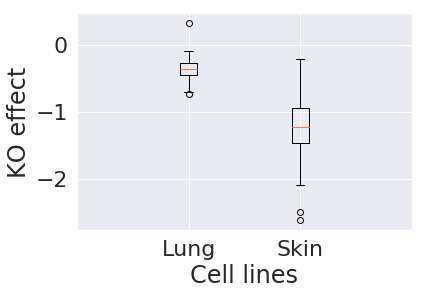

In [166]:
fig_1 = plt.boxplot(notskin_sox10, positions = [1])
plt.boxplot(skin_sox10, positions = [2])
axes = plt.gca()
axes.set_xlim([0,3])
plt.ylabel("KO effect")
plt.xlabel("Cell lines")
axes.set_xticks([1, 2])
axes.set_xticklabels(["Lung","Skin"])
plt.savefig("Lecture_15_boxplots_crispr.pdf")

In [167]:
mean_skin = np.mean(skin_sox10)
mean_notskin = np.mean(notskin_sox10)
print(mean_skin, mean_notskin, mean_skin - mean_notskin)

-1.175113488569037 -0.35639231280595385 -0.8187211757630832


In [168]:
skin_stdev = np.std(skin_sox10,ddof = 1)
notskin_stdev = np.std(notskin_sox10, ddof = 1)

n_skin = np.size(skin_sox10)
n_not = np.size(notskin_sox10)

sp2 = ((n_skin-1)*skin_stdev**2 + (n_not - 1)*notskin_stdev**2)/(n_skin+n_not-2)
print(sp2)

0.12093008145254322


In [169]:
std_error = np.sqrt((sp2/n_skin) + (sp2/n_not))
print(std_error)

0.05852379846415762


In [171]:
t = (mean_skin - mean_notskin)/std_error
print(t)

-13.989542668945212


In [172]:
n_skin+n_not-2

154

15 10
20 15
40 35
100 80


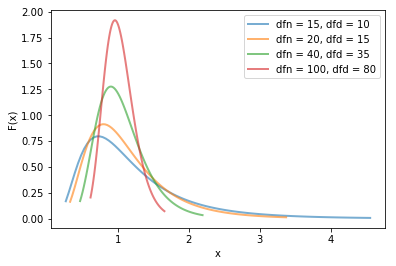

In [14]:
### F-distribution
from scipy.stats import f
fig, ax = plt.subplots(1, 1)
dfn, dfd = [15, 20, 40, 100], [10, 15, 35, 80]

for [dfn_i, dfd_i] in zip(dfn, dfd):
    print(dfn_i, dfd_i)
    mean, var, skew, kurt = f.stats(dfn_i, dfd_i, moments='mvsk')
    x = np.linspace(f.ppf(0.01, dfn_i, dfd_i),
                f.ppf(0.99, dfn_i, dfd_i), 100)
    ax.plot(x, f.pdf(x, dfn_i, dfd_i), alpha=0.6,
             lw=2, label=f'dfn = {dfn_i}, dfd = {dfd_i}')

plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)");
plt.savefig("Lecture_15_f_distribution.pdf")